## Demands and time
This code is for vidualize the relationship between the time and the demand

In [18]:
"""
    Dependencies
"""
import pandas as pd
import numpy as np
import datetime
from sklearn import mixture
import matplotlib.pyplot as plt

[]


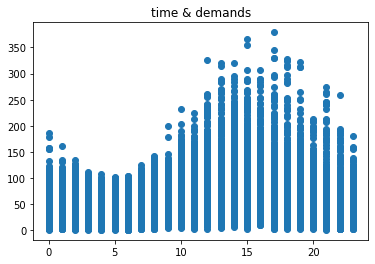

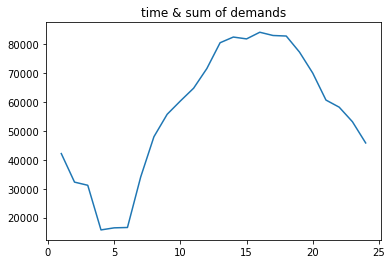

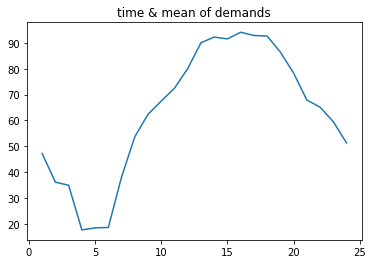

In [56]:
"""
    Read the file and implement the buckets
"""
buckets = [[]]*24
bucket_sizes = []
bucket_means = []
df = pd.read_csv('train_E1GspfA.csv')
print(bucket_sizes)
x = df['hour']
y = df['demand']
z = df['date']
z = z.drop_duplicates();

# fill in the buckets
for i in range(0, len(buckets)):
    buckets[i] = (df.loc[df['hour'] == i])['demand']
    bucket_sizes.append(np.sum(buckets[i]))
    bucket_means.append(np.sum(buckets[i])/len(z))

# show the distribution of the demands
plt.scatter(x, y)
plt.title('time & demands')
plt.show()

plt.plot(np.arange(1, 25, 1), bucket_sizes)
plt.title('time & sum of demands')
plt.show()

plt.plot(np.arange(1, 25, 1), bucket_means)
plt.title('time & mean of demands')
plt.show()

# visualize the distribution
def drawBuckets(buckets):
    for i in range(0, len(buckets)):
        x = np.arange(0, buckets[i].shape[0], 1)
        y = buckets[i]
        print(x.shape)
        print(y.shape)
        plt.scatter(x, y)
        plt.show()

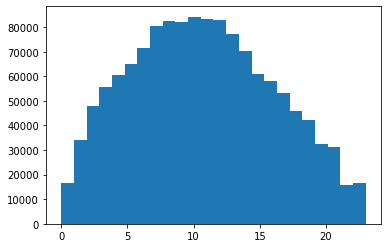

[[15.55204311]
 [ 6.90082521]]
[[[13.60684571]]

 [[12.79762874]]]


In [85]:
"""
    Use the guassian mixture model to model the distribution
"""
data = []
for i in range(0,len(bucket_sizes)):
    for j in range(0, bucket_sizes[i]):
        data.append((i+19)%24)

# plt the data
plt.hist(data, bins=24)
plt.show()

# get the data distribution
data = np.array(data).reshape((-1,1))

gmm = mixture.GaussianMixture(
    n_components=2
)
gmm.fit(data)
print(gmm.means_)
print(gmm.covariances_)

[0.43477126 0.56522874]


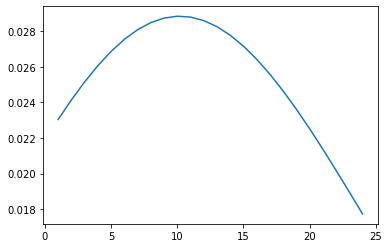

In [94]:
# print the gmm distribution
import scipy.stats as stats
means = gmm.means_
vars = gmm.covariances_
weights = gmm.weights_
print(weights)
x = np.arange(1, 25, 1)
#plt.hist(data, bins=24)
plt.plot(x, weights[0]*stats.norm.pdf(x, means[0], vars[0])[0] + weights[1]*stats.norm.pdf(x, means[1], vars[1])[0])
plt.show()